In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [95]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [9]:
df=pd.read_csv(r"C:\Users\hp\Downloads\archive (2)\Boston.csv")



In [10]:
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [20]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [17]:
df.shape

(506, 15)

In [18]:
df.head

<bound method NDFrame.head of      Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax 

In [19]:
df.isnull().any()

Unnamed: 0    False
crim          False
zn            False
indus         False
chas          False
nox           False
rm            False
age           False
dis           False
rad           False
tax           False
ptratio       False
black         False
lstat         False
medv          False
dtype: bool

In [56]:
x=df.iloc[:,1:14]
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [57]:
x.dropna

<bound method DataFrame.dropna of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  

In [33]:
y=df['medv']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [60]:
x.isnull().any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
dtype: bool

In [36]:
le=LabelEncoder()
y=le.fit_transform(y)

In [37]:
y


array([137, 113, 196, 193, 203, 165, 126, 156,  64,  87,  52,  87, 114,
       102,  80,  97, 128,  73, 100,  80,  40,  94,  54,  48,  57,  42,
        65,  50,  82, 108,  32,  48,  36,  35,  39,  87,  98, 108, 144,
       176, 197, 153, 149, 144, 110,  91,  98,  65,  47,  92,  95, 103,
       146, 131,  87, 200, 144, 181, 130,  94,  85,  59, 119, 146, 189,
       132,  92, 117,  72, 107, 139, 114, 125, 131, 138, 111,  98, 106,
       110, 101, 159, 136, 145, 126, 136, 153, 122, 119, 133, 165, 123,
       117, 126, 146, 104, 162, 111, 211, 219, 191, 157, 152,  84,  91,
        99,  93,  93, 102,  96,  92, 114, 125,  86,  85,  83,  81, 110,
        90, 102,  91, 117, 101, 103,  71,  86, 111,  58,  61,  78,  46,
        90,  94, 127,  82,  57,  79,  72,  69,  37,  76,  43,  47,  38,
        57,  25,  41,  57,  49,  76,  56, 112,  94,  55,  92,  68,  57,
        35, 213, 140, 130, 155, 228, 228, 228, 124, 146, 228, 135, 135,
       120,  72,  89, 128, 133, 123, 168, 129, 143, 171, 207, 21

In [38]:
y.shape

(506,)

In [63]:


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


<Axes: >

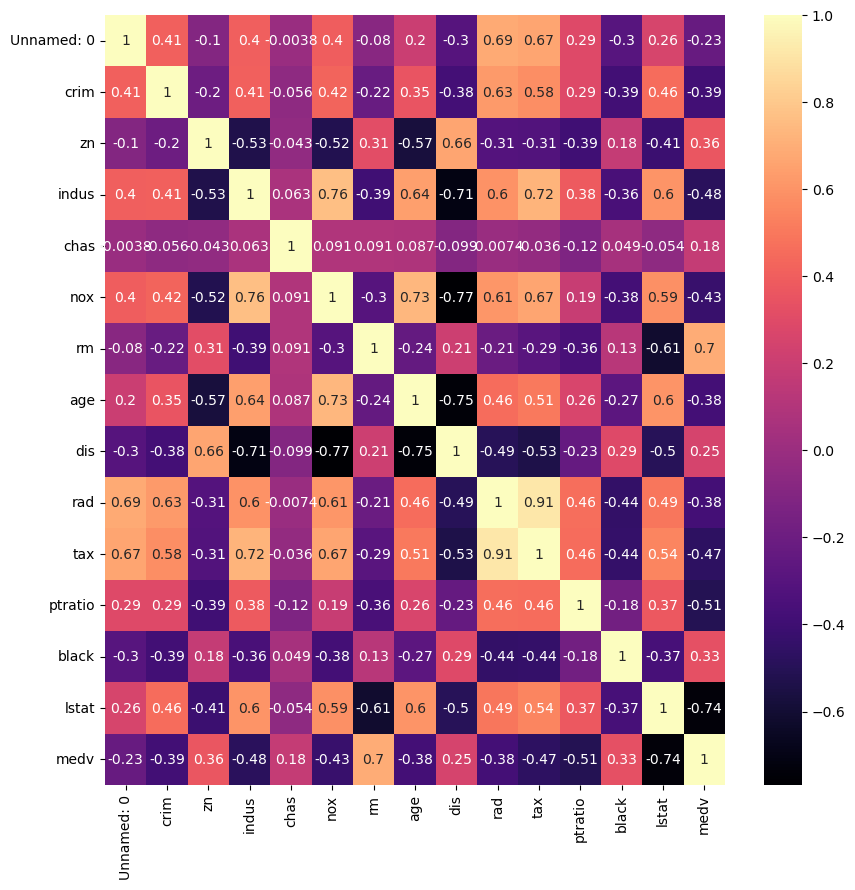

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot= True,cmap="magma")

In [85]:
m=df[['lstat','medv','rm']]

In [83]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

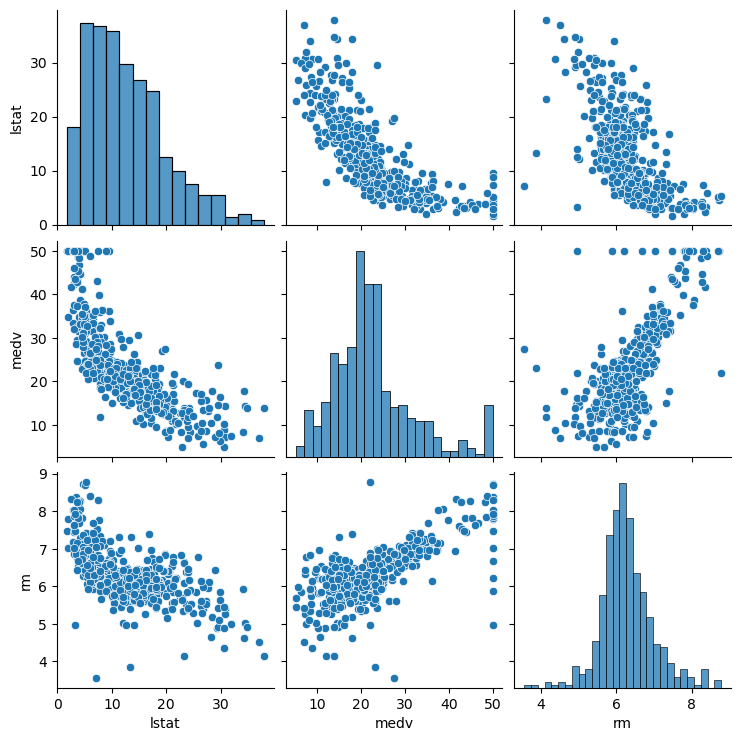

In [87]:
sns.pairplot(m)
plt.show()

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2000)

In [101]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [102]:
model=LinearRegression()

In [103]:
model.fit(x_train,y_train)

LinearRegression()

In [104]:
ypred=model.predict(x_test)

In [112]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, ypred)

20.115553240494435

In [113]:
from sklearn.metrics import mean_squared_error

In [114]:
mean_squared_error(y_test,ypred)

732.3731070126257

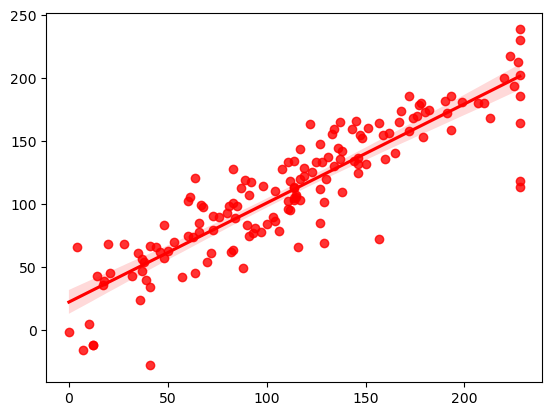

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x=y_test, y=ypred,color='red')
plt.show()
